In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder

PART 1

Download the data set adult-modified.csv and load it into an appropriate data structure such as a Pandas dataframe. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numeric attributes and frequencies associated with categorical attributes.

In [2]:
file_path = 'adult-modified.csv' 
data = pd.read_csv(file_path) # reading the file path 

data_shape = data.shape #checking the data shape in rows and columns
print(data.shape)

(9412, 8)


In [3]:
data.head(10) # to display 10 contents of all data

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
5,37,Private,14,Married,White,Female,40,<=50K
6,49,Private,5,Married,Black,Female,16,<=50K
7,52,Self-emp,9,Married,White,Male,45,>50K
8,31,Private,14,Single,White,Female,50,>50K
9,42,Private,13,Married,White,Male,40,>50K


In [4]:
data.dtypes # checking all the datatypes press in each data class

age                int64
workclass         object
education          int64
marital-status    object
race              object
sex               object
hours-per-week     int64
income            object
dtype: object

In [5]:
dfNew=pd.get_dummies(data) # using dummies to convert all the data that isin true or false to binary here
dfNew=dfNew.astype(int) # converted it into numeric values of 0 and 1
dfNew

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,38,10,60,1,0,0,1,0,0,0,0,0,1,0,1,0,1
9408,25,9,8,1,0,0,0,1,0,0,0,0,1,1,0,1,0
9409,21,10,40,1,0,0,0,1,0,0,1,0,0,0,1,1,0
9410,38,2,53,1,0,0,1,0,0,0,0,0,1,0,1,1,0


In [6]:
dfNew.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9412 entries, 0 to 9411
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     9412 non-null   int32
 1   education               9412 non-null   int32
 2   hours-per-week          9412 non-null   int32
 3   workclass_Private       9412 non-null   int32
 4   workclass_Public        9412 non-null   int32
 5   workclass_Self-emp      9412 non-null   int32
 6   marital-status_Married  9412 non-null   int32
 7   marital-status_Single   9412 non-null   int32
 8   race_Amer-Indian        9412 non-null   int32
 9   race_Asian              9412 non-null   int32
 10  race_Black              9412 non-null   int32
 11  race_Hispanic           9412 non-null   int32
 12  race_White              9412 non-null   int32
 13  sex_Female              9412 non-null   int32
 14  sex_Male                9412 non-null   int32
 15  income_<=50K         

In [7]:
numeric_description = dfNew.describe()
numeric_description

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
count,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000
mean,38.357310,10.125266,41.080217,0.738100,0.139928,0.121972,0.503294,0.496706,0.009775,0.030918,0.094773,0.007969,0.856566,0.321823,0.678177,0.753612,0.246388
std,12.962135,2.542118,11.884590,0.439692,0.346930,0.327271,0.500016,0.500016,0.098388,0.173105,0.292916,0.088915,0.350533,0.467200,0.467200,0.430930,0.430930
min,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,10.000000,40.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,47.000000,13.000000,45.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Categorical Attributes

In [8]:
[(data[cat_col].value_counts()) for cat_col in data.select_dtypes('object').columns]

[workclass
 Private     6947
 Public      1317
 Self-emp    1148
 Name: count, dtype: int64,
 marital-status
 Married    4737
 Single     4675
 Name: count, dtype: int64,
 race
 White          8062
 Black           892
 Asian           291
 Amer-Indian      92
 Hispanic         75
 Name: count, dtype: int64,
 sex
 Male      6383
 Female    3029
 Name: count, dtype: int64,
 income
 <=50K    7093
 >50K     2319
 Name: count, dtype: int64]

Part 2

For the three numeric attributes (age, hours-per-week, education), display box plots that show the overall dispersion and skew in these variables. Next, create histograms for these three variables showing the overall data distribution in each. Finally, display a scatter plot of age (x-axis) vs. hours-per-week (y-axis).

In [9]:
dfNew=pd.get_dummies(data)
dfNew=dfNew.astype(int)
dfNew

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,38,10,60,1,0,0,1,0,0,0,0,0,1,0,1,0,1
9408,25,9,8,1,0,0,0,1,0,0,0,0,1,1,0,1,0
9409,21,10,40,1,0,0,0,1,0,0,1,0,0,0,1,1,0
9410,38,2,53,1,0,0,1,0,0,0,0,0,1,0,1,1,0


Numeric Attributes

In [10]:
print(dfNew[['age', 'education', 'hours-per-week']])

      age  education  hours-per-week
0      39         13              40
1      50         13              13
2      38          9              40
3      53          7              40
4      28         13              40
...   ...        ...             ...
9407   38         10              60
9408   25          9               8
9409   21         10              40
9410   38          2              53
9411   39         10              40

[9412 rows x 3 columns]


Boxplots

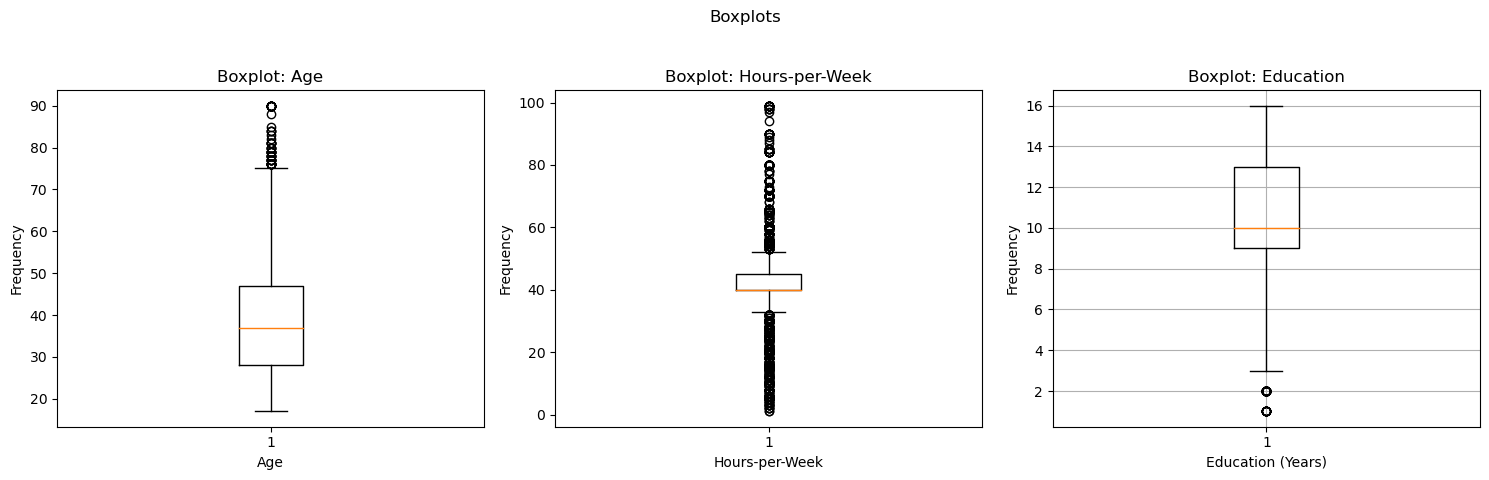

In [58]:
# Creating box plots
plt.figure(figsize=(15, 5))
plt.suptitle('Boxplots')

plt.subplot(1,3,1)
plt.boxplot(dfNew['age'])
plt.title('Boxplot: Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
plt.boxplot(dfNew['hours-per-week'])
plt.title('Boxplot: Hours-per-Week')
plt.xlabel('Hours-per-Week')
plt.ylabel('Frequency')

plt.subplot(1,3,3)             
plt.boxplot(dfNew['education'])
plt.title('Boxplot: Education')
plt.xlabel('Education (Years)')
plt.ylabel('Frequency')

plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

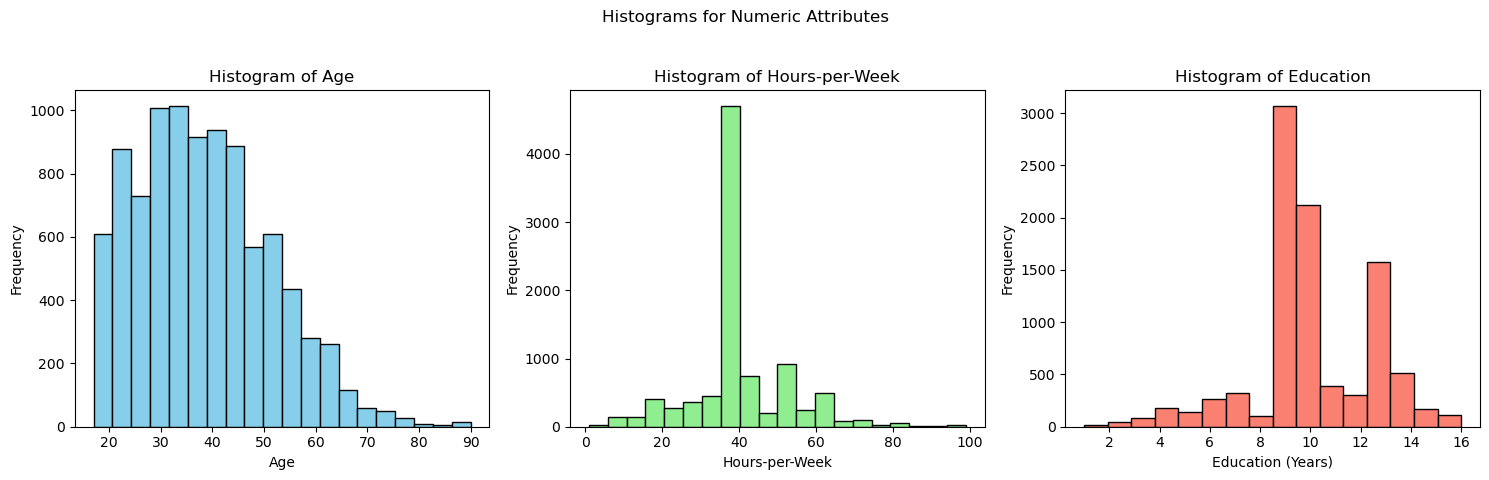

In [59]:
# Creating histograms for the three numeric variables
plt.figure(figsize=(15, 5))
plt.suptitle('Histograms for Numeric Attributes')

# Histogram for Age
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st subplot
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for Hours-per-Week
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd subplot
plt.hist(data['hours-per-week'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Hours-per-Week')
plt.xlabel('Hours-per-Week')
plt.ylabel('Frequency')

# Histogram for Education
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd subplot
plt.hist(data['education'], bins=16, color='salmon', edgecolor='black')  # 16 bins for 16 education years
plt.title('Histogram of Education')
plt.xlabel('Education (Years)')
plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Scatter plot

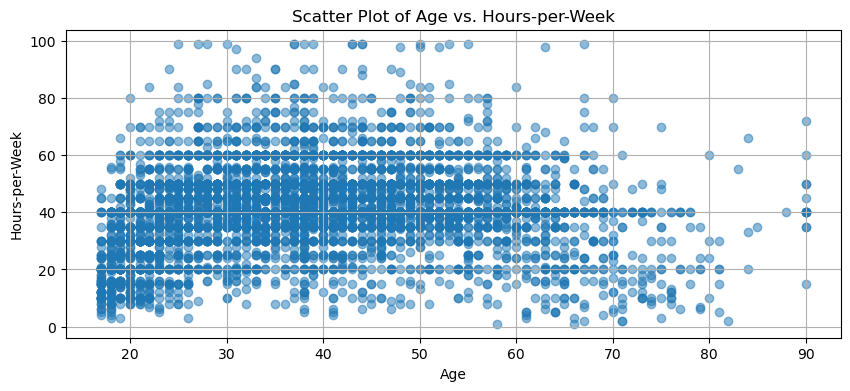

In [12]:
#Scatter plot of age vs. hours-per-week

plt.figure(figsize=(10, 4)) # figure size
plt.scatter(data['age'], data['hours-per-week'], alpha=0.5) # to plot the are with data as age and hours-per-week
plt.title('Scatter Plot of Age vs. Hours-per-Week') # Title to print on top of the plot
plt.xlabel('Age') # x label to print
plt.ylabel('Hours-per-Week') # y label to print
plt.grid(True) 
plt.show() # to publish the given data as a plot

PART - 3

For the remaining categorical attributes create bar charts that show the distribution of category frequencies (e.g., married vs. single; private vs. public vs. self-emp; etc). Ideally, you should use bar charts in a single figure similar to this figure.

In [60]:
categorical_df = data.select_dtypes('object')

In [61]:
categorical_df.head(10)

,workclass,marital-status,race,sex,income
0,Public,Single,White,Male,<=50K
1,Self-emp,Married,White,Male,<=50K
2,Private,Single,White,Male,<=50K
3,Private,Married,Black,Male,<=50K
4,Private,Married,Black,Female,<=50K
5,Private,Married,White,Female,<=50K
6,Private,Married,Black,Female,<=50K
7,Self-emp,Married,White,Male,>50K
8,Private,Single,White,Female,>50K
9,Private,Married,White,Male,>50K


In [62]:
count_df = pd.DataFrame()
for col in categorical_df.columns:
    temprory_df = pd.DataFrame(categorical_df[col].value_counts()).reset_index().rename({f'{col}':'value'}, axis=1)
    temprory_df['%colors_name'] = col
    count_df = pd.concat([count_df, temprory_df], axis=0)

In [63]:
count_df.reset_index(drop=True, inplace= True)


In [64]:
count_df

,value,count,%colors_name
0,Private,6947,workclass
1,Public,1317,workclass
2,Self-emp,1148,workclass
3,Married,4737,marital-status
4,Single,4675,marital-status
5,White,8062,race
6,Black,892,race
7,Asian,291,race
8,Amer-Indian,92,race
9,Hispanic,75,race


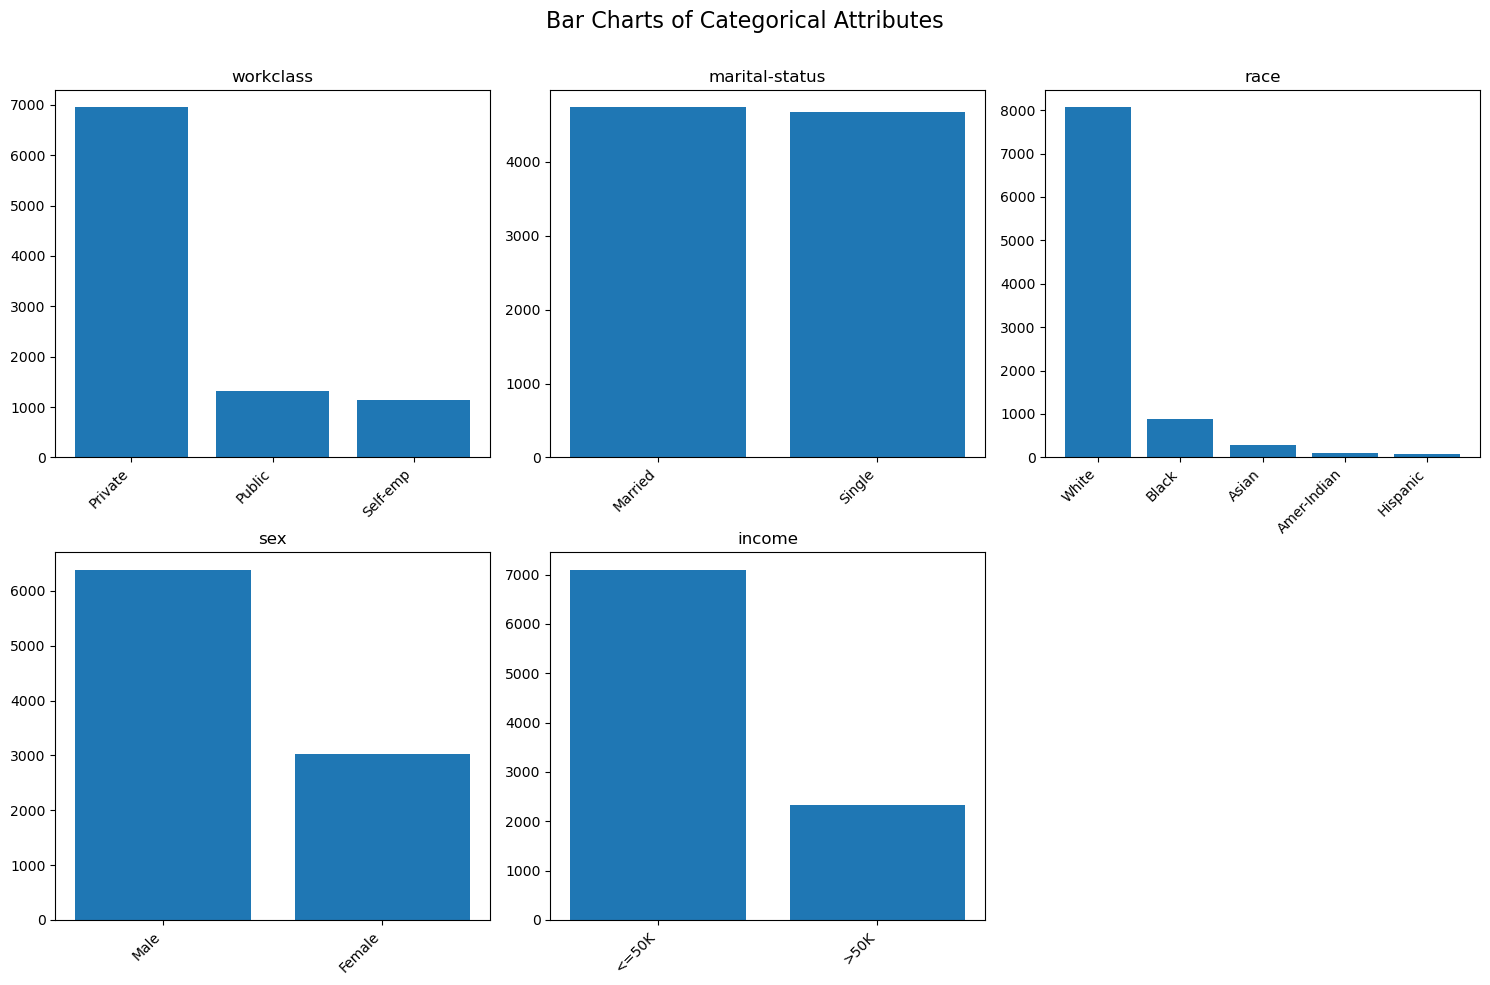

In [65]:
# Categorical columns in the dataset
categorical_columns = ['workclass', 'marital-status', 'race', 'sex', 'income']

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  
fig.suptitle('Bar Charts of Categorical Attributes', fontsize=16)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the categorical columns and create bar charts
for i, col in enumerate(categorical_columns):
    value_counts = data[col].value_counts()
    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_title(col)

    # Set the x-ticks and their labels with rotation
    axes[i].set_xticks(range(len(value_counts.index)))
    axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')

# Hide any unused axes
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top padding
plt.show()


PART 4

Perform a cross-tabulations of each of the workclass and race attributes with the income attribute. Show the resulting cross-tab tables as well as bar charts to visualize the relationships between these pairs of attributes. [Hint: you can use aggregation functions in Pandas such as groupby() and  cross-tab(), then either using Matplotlib directly or the plot() function in Pandas create the bar charts]. As an illustration, consider this graph depicting the cross-tabulation of sex with income. In the case of race vs. income cross-tab, create another chart comparing the percentages of each race category that fall in the low-income group.

In [66]:
# Group and count for 'workclass' and 'income'
workclass_income_group = data.groupby(['workclass', 'income']).size().reset_index(name='count')
workclass_income_group = workclass_income_group.head(10)

# Group and count for 'race' and 'income'
race_income_group = data.groupby(['race', 'income']).size().reset_index(name='count')
race_income_group = race_income_group.head(6)

# Combine the DataFrames
combined_df = pd.concat([workclass_income_group, race_income_group], axis=1)

combined_df.columns = ['Workclass', 'Income', 'Count', 'Race', 'Income', 'Count']
combined_df.fillna('N/A', inplace=True)

print(combined_df)

  Workclass Income  Count         Race Income  Count
0   Private  <=50K   5443  Amer-Indian  <=50K     83
1   Private   >50K   1504  Amer-Indian   >50K      9
2    Public  <=50K    925        Asian  <=50K    224
3    Public   >50K    392        Asian   >50K     67
4  Self-emp  <=50K    725        Black  <=50K    773
5  Self-emp   >50K    423        Black   >50K    119


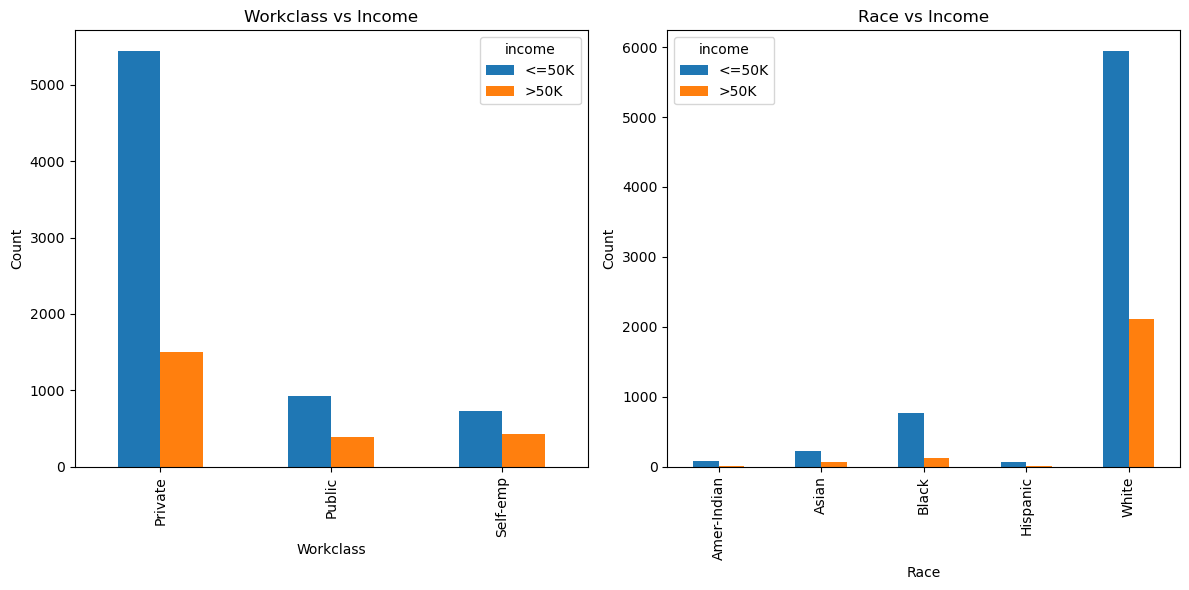

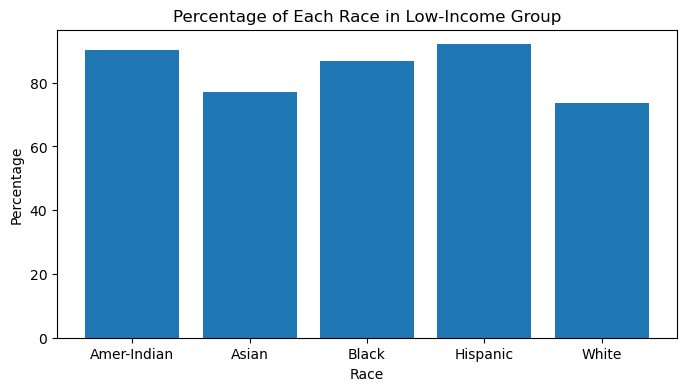

In [67]:
# Cross-tabulation and bar charts
workclass_income_crosstab = pd.crosstab(data['workclass'], data['income'])
race_income_crosstab = pd.crosstab(data['race'], data['income'])

plt.figure(figsize=(12, 6))

# Workclass vs Income
plt.subplot(1, 2, 1)
workclass_income_crosstab.plot(kind='bar', ax=plt.gca())
plt.title('Workclass vs Income')
plt.xlabel('Workclass')
plt.ylabel('Count')

# Race vs Income
plt.subplot(1, 2, 2)
race_income_crosstab.plot(kind='bar', ax=plt.gca())
plt.title('Race vs Income')
plt.xlabel('Race')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Percentage distribution for race in low-income group
race_income_group = data.groupby(['income', 'race']).size().reset_index(name='count')
total_race_counts = data['race'].value_counts()
race_income_group['total_count'] = race_income_group['race'].map(total_race_counts)
race_income_group['percent'] = (race_income_group['count'] / race_income_group['total_count']) * 100

plt.figure(figsize=(8, 4))
low_income_race_percent = race_income_group[race_income_group['income'] == '<=50K']
plt.bar(low_income_race_percent['race'], low_income_race_percent['percent'])
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.title('Percentage of Each Race in Low-Income Group')
plt.show()


PART 5

Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. You may consider first creating separate subsets of the data based on the income categories and then characterizing each subset by observing summary statistics for each group across different variables. Discuss your observations focusing specifically on unique characteristics that seem to distinguish among the two groups. You may (though you are not required to) use charts or plots for visualizing the differences in your analysis.

In [68]:
def q1(x):
    return x.quantile(0.50)

def q3(x):
    return x.quantile(0.50)

# Aggregating statistical attributes of numeric features by income group
statistical_attributes = data.groupby('income').agg({
    'age': ['min', q1, 'mean', 'median', q3, 'max'],
    'education': ['min', q1, 'mean', 'median', q3, 'max'],
    'hours-per-week': ['min', q1, 'mean', 'median', q3, 'max']
}).reset_index()

# Print the aggregated statistics
print(statistical_attributes)

  income age                                   education                   \
         min    q1       mean median    q3 max       min    q1       mean   
0  <=50K  17  35.0  36.635979   35.0  35.0  90         1   9.0   9.646976   
1   >50K  19  43.0  43.622251   43.0  43.0  90         2  12.0  11.588185   

                   hours-per-week                                    
  median    q3 max            min    q1       mean median    q3 max  
0    9.0   9.0  16              1  40.0  39.567038   40.0  40.0  99  
1   12.0  12.0  16              1  40.0  45.708495   40.0  40.0  99  


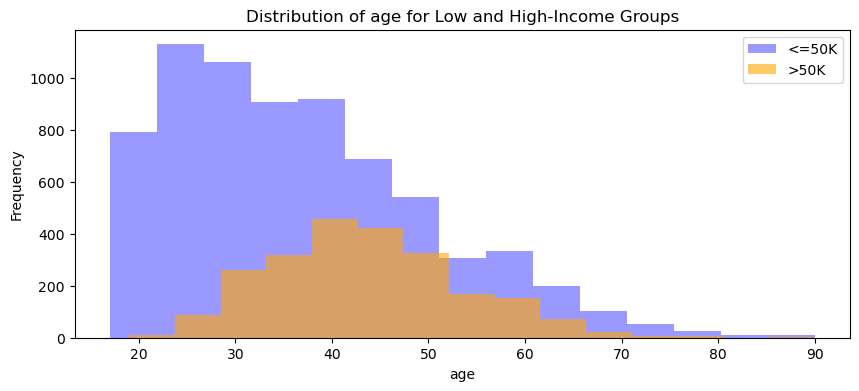

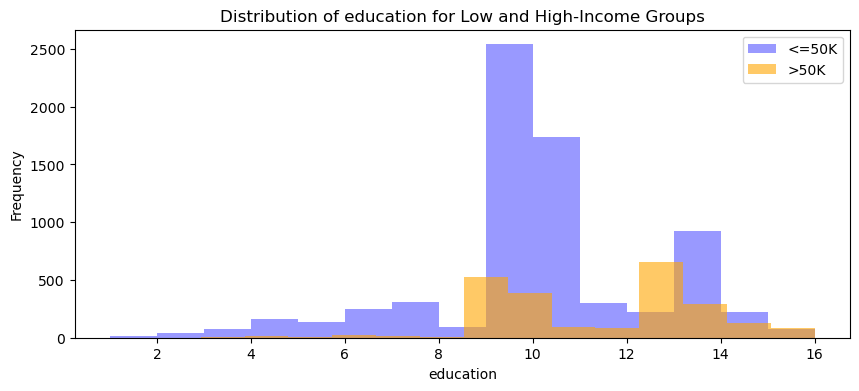

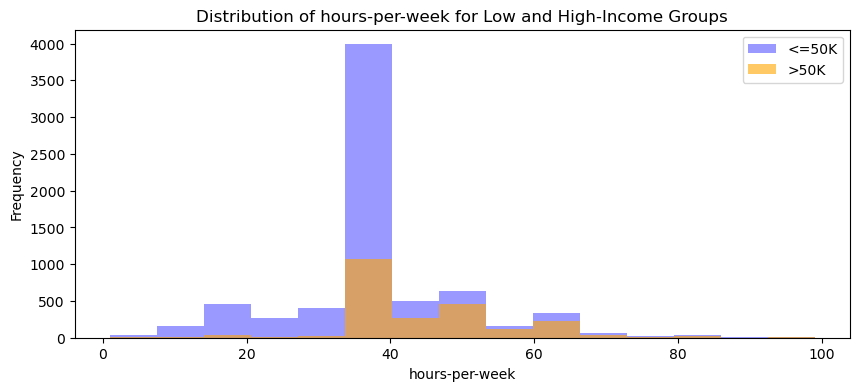

In [69]:
low_income_data = data[data['income'] == '<=50K']
high_income_data = data[data['income'] == '>50K']


# List of numeric attributes
numeric_attributes = ['age', 'education', 'hours-per-week']

# Create histograms for each numeric attribute for different income groups
for attribute in numeric_attributes:
    plt.figure(figsize=(10, 4))

    # Histogram for low-income group
    plt.hist(low_income_data[attribute], bins=15, alpha=0.4, label='<=50K', color='blue')

    # Histogram for high-income group
    plt.hist(high_income_data[attribute], bins=15, alpha=0.6, label='>50K', color='orange')

    plt.title(f'Distribution of {attribute} for Low and High-Income Groups')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()



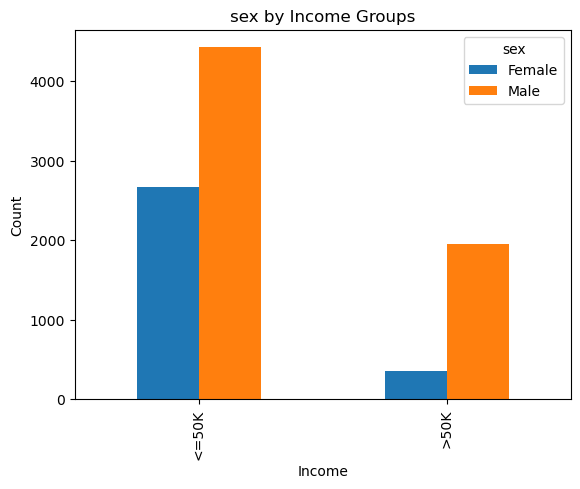

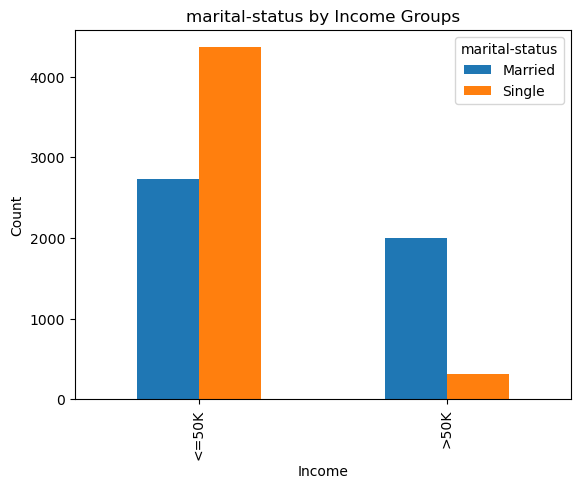

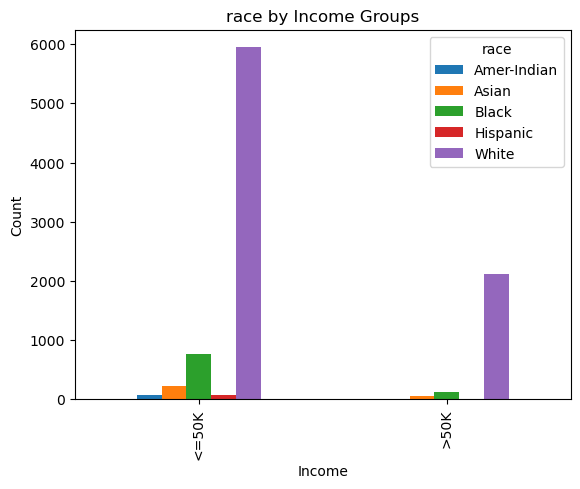

In [71]:
# Bar charts for categorical attributes
for col in ['sex', 'marital-status', 'race']:
    pd.crosstab(data['income'], data[col]).plot(kind='bar')
    plt.title(f'{col} by Income Groups')
    plt.xlabel('Income')
    plt.ylabel('Count')
    plt.show()

PART 6

Convert the data into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). The numeric attributes should remain unchanged. Save this data in a new dataframe and show the top 10 rows in the new dataframe. Also save this new table into a local file called adult_numeric.csv

In [72]:
# Convert categorical variables into dummy variables
dfNew = pd.get_dummies(data)

In [73]:
# Convert the data types of dummy variables to integer
dfNew = dfNew.astype(int)

In [76]:
# Display the first 10 rows of the new DataFrame
print(dfNew.head(10))

# Save the DataFrame to a CSV file
dfNew.to_csv(r'N:\Programming machine learning\assignment1\adult_numeric.csv', index=False, encoding='utf-8')


   age  education  hours-per-week  workclass_Private  workclass_Public  \
0   39         13              40                  0                 1   
1   50         13              13                  0                 0   
2   38          9              40                  1                 0   
3   53          7              40                  1                 0   
4   28         13              40                  1                 0   
5   37         14              40                  1                 0   
6   49          5              16                  1                 0   
7   52          9              45                  0                 0   
8   31         14              50                  1                 0   
9   42         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                    

PART 7

Using the numeric data set with the dummy variables (of the previous part), perform basic correlation analysis among the attributes. You need to construct a complete Correlation Matrix (with rows and columns corresponding to each variable). [Hint: you can create the correlation matrix by using the corr() function in Pandas or corrcoef function in NumPy]. Next, using your correlation matrix, display in decreasing order of correlations, all attributes and their correlations to education. Repeat this step to display correlations with the attribute income_<=50K. Briefly discuss your general observations about this sample of adult population based on this correlation analysis.

In [77]:
correlation_matrix = dfNew.corr()
print(correlation_matrix)

                             age  education  hours-per-week  \
age                     1.000000   0.034733        0.103170   
education               0.034733   1.000000        0.141730   
hours-per-week          0.103170   0.141730        1.000000   
workclass_Private      -0.202982  -0.154977       -0.097753   
workclass_Public        0.080254   0.154462       -0.021407   
workclass_Self-emp      0.187633   0.044472        0.154025   
marital-status_Married  0.381168   0.050627        0.183944   
marital-status_Single  -0.381168  -0.050627       -0.183944   
race_Amer-Indian       -0.010904  -0.039308        0.002964   
race_Asian             -0.008097   0.057360        0.000550   
race_Black             -0.008668  -0.069029       -0.071442   
race_Hispanic          -0.031973  -0.044845        0.011964   
race_White              0.022413   0.051765        0.055561   
sex_Female             -0.071804  -0.008180       -0.221588   
sex_Male                0.071804   0.008180        0.22

In [78]:
# Display correlations with 'education' in descending order
education_correlations = correlation_matrix['education'].sort_values(ascending=False)
print("Correlations with Education:")
print(education_correlations)

Correlations with Education:
education                 1.000000
income_>50K               0.329066
workclass_Public          0.154462
hours-per-week            0.141730
age_category_mid-age      0.131386
race_Asian                0.057360
race_White                0.051765
marital-status_Married    0.050627
workclass_Self-emp        0.044472
age                       0.034733
sex_Male                  0.008180
sex_Female               -0.008180
race_Amer-Indian         -0.039308
race_Hispanic            -0.044845
marital-status_Single    -0.050627
age_category_old         -0.062266
race_Black               -0.069029
age_category_young       -0.090411
workclass_Private        -0.154977
income_<=50K             -0.329066
Name: education, dtype: float64


In [79]:
# Display correlations with 'income_<=50K' in descending order
income_correlations = correlation_matrix['income_<=50K'].sort_values(ascending=False)
print("\nCorrelations with Income <= 50K:")
print(income_correlations)


Correlations with Income <= 50K:
income_<=50K              1.000000
marital-status_Single     0.414173
age_category_young        0.288221
sex_Female                0.203886
workclass_Private         0.116453
race_Black                0.084836
race_Hispanic             0.034607
race_Amer-Indian          0.034254
race_Asian                0.006693
workclass_Public         -0.047981
age_category_old         -0.089261
race_White               -0.092589
workclass_Self-emp       -0.105593
age_category_mid-age     -0.200201
sex_Male                 -0.203886
hours-per-week           -0.222686
age                      -0.232261
education                -0.329066
marital-status_Married   -0.414173
income_>50K              -1.000000
Name: income_<=50K, dtype: float64


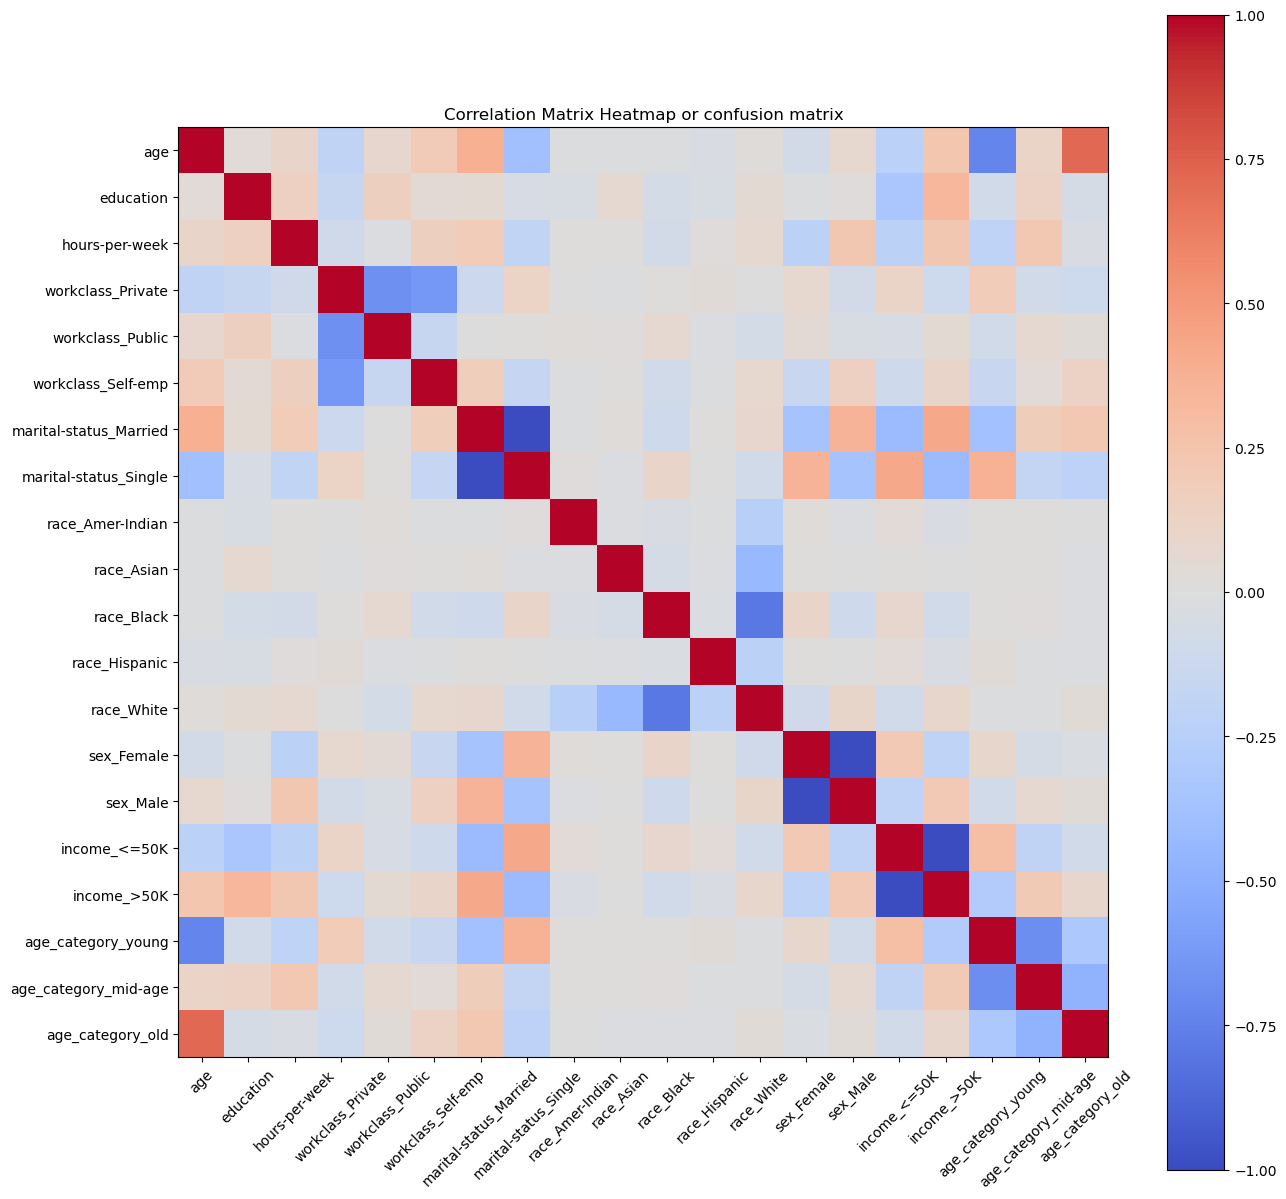

In [80]:
plt.figure(figsize=(15, 15))

# Creating the heatmap with Matplotlib
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()  # Adds a colorbar to the side

# Adding title
plt.title('Correlation Matrix Heatmap or confusion matrix')

# Adding tick marks and labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Show the plot
plt.show()

PART 8

Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). Do not change the original age attribute or add the discretized age to the table. Create a new dataframe with the numeric and the discretized age attributes as two columns and display the top 10 rows of the new dataframe.

In [81]:
data = pd.read_csv('adult-modified.csv')

# Define the age bins and corresponding labels
age_bins = [0, 30, 50, 80] 
age_labels = ['young', 'mid-age', 'old']

# Discretize the age attribute
data['age_category'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Create a new DataFrame with original 'age' and discretized 'age_category'
new_data = data[['age', 'age_category']]

# Display the top 10 rows of the new DataFrame
print(new_data.head(10))

   age age_category
0   39      mid-age
1   50      mid-age
2   38      mid-age
3   53          old
4   28        young
5   37      mid-age
6   49      mid-age
7   52          old
8   31      mid-age
9   42      mid-age


PART 9

Use Min-Max Normalization to transform the values of the attribute hours-per-week the range 0.0-1.0 (without changing the original data). Next, perform zscore normalization to standardize the values of all numeric attributes (age, hours-per-week, education). The latter step should be performed on all three attributes at the same time instead of one-by-one (you may wish to first create a separate dataframe with only these attributes and perform the operation on the whole dataframe. Note: for this problem, you should write your own code to perform the normalization; do not use pre-existing functions such as scikit-learn's MinMaxScaler(). Finally, show the top 10 rows of the three versions of the hours-per-week attribute (original, normalized, and standardized) side-by-side in a new dataframe.

In [83]:
def minMaxNormalization(col):
    max_value = col.max()
    min_value = col.min()
    norm_vals = (col - min_value) / (max_value - min_value)
    return norm_vals

In [84]:
def zScoreNormalization(df):
    for col in df.columns:
        mean_val = df[col].mean()
        sd_val = df[col].std()
        df[f'{col}_znorm'] = (df[col] - mean_val) / sd_val
    return df

In [85]:
# Create a DataFrame with numeric attributes
numeric_df = data[['age', 'education', 'hours-per-week']]

In [86]:
# Create a copy of the DataFrame with numeric attributes
numeric_df = data[['age', 'education', 'hours-per-week']].copy()

# Apply Min-Max Normalization to 'hours-per-week'
numeric_df['hours_per_week_min_max'] = minMaxNormalization(numeric_df['hours-per-week'])

# Apply Z-Score Normalization to all numeric attributes
final_norm_df = zScoreNormalization(numeric_df)

# Create a DataFrame to display the results
result_df = final_norm_df[['hours-per-week', 'hours_per_week_min_max', 'hours-per-week_znorm']].head(10)
print(result_df)


   hours-per-week  hours_per_week_min_max  hours-per-week_znorm
0              40                0.397959             -0.090892
1              13                0.122449             -2.362742
2              40                0.397959             -0.090892
3              40                0.397959             -0.090892
4              40                0.397959             -0.090892
5              40                0.397959             -0.090892
6              16                0.153061             -2.110314
7              45                0.448980              0.329821
8              50                0.500000              0.750534
9              40                0.397959             -0.090892


PART 10

Now download a modified version of the data  (adult-modified-missing-vals.csv) that contains missing values. (a) Using Pandas determine all the attributes with missing values and the number of missing values for each such attribute. (b) Show all the instances in the data that contain a missing value. (c) Fill the missing values for all numeric attributes using the mean value for the attribute. (d) After filling in the missing numeric values, drop all rows where a categorical attribute contains a missing value. (e) Show that the final resulting table does not contain missing values.

(a) Using Pandas determine all the attributes with missing values and the number of missing values for each such attribute

In [87]:
# Potential placeholders for missing values
missing_value_indicators = ['?', 'NaN', 'NA', '--', '']


data_missing = pd.read_csv('N:/Programming machine learning/assignment1/adult-modified-missing-vals.csv', na_values=missing_value_indicators)

# Check for missing values again
missing_values_info = data_missing.isnull().sum()
missing_values_info


age               198
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

b) Show all the instances in the data that contain a missing value. 

In [88]:
# Print information about missing values
print(data_missing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9802 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       10000 non-null  int64  
 3   marital-status  10000 non-null  object 
 4   race            10000 non-null  object 
 5   sex             10000 non-null  object 
 6   hours-per-week  10000 non-null  int64  
 7   income          10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB
None


(c) Fill the missing values for all numeric attributes using the mean value for the attribute. 

In [89]:
# Display rows with at least one missing value
print("\nRows with missing values:")
print(data_missing[data_missing.isnull().any(axis=1)])


Rows with missing values:
       age workclass  education marital-status         race     sex  \
19     NaN  Self-emp         14         Single        White  Female   
27     NaN       NaN         10        Married        Asian    Male   
40     NaN   Private          5        Married        White    Male   
61    32.0       NaN          4        Married        White    Male   
65     NaN   Private          9        Married        White    Male   
...    ...       ...        ...            ...          ...     ...   
9965   NaN   Private         10        Married  Amer-Indian  Female   
9966   NaN   Private         13        Married        White    Male   
9987  67.0       NaN          4        Married        White    Male   
9993   NaN   Private          9        Married        White  Female   
9998   NaN   Private          2        Married        White    Male   

      hours-per-week income  
19                45   >50K  
27                60   >50K  
40                43  <=50K  


(d) After filling in the missing numeric values, drop all rows where a categorical attribute contains a missing value

In [90]:
# Fill missing values in numeric columns with their mean
numeric_columns = data_missing.select_dtypes(include=['int64', 'float64']).columns
data_missing[numeric_columns] = data_missing[numeric_columns].apply(lambda x: x.fillna(x.mean()))

In [91]:
# Drop rows with missing categorical values
data_missing.dropna(inplace=True)

(e) Show that the final resulting table does not contain missing values.

In [92]:
# Check if there are any missing values left
final_missing_values_count = data_missing.isnull().sum()
print("\nMissing values in each column after cleaning:")
print(final_missing_values_count)


Missing values in each column after cleaning:
age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64


In [93]:
# Ensuring no rows with missing values
print("\nRows with missing values after cleaning:")
print(data_missing[data_missing.isnull().any(axis=1)])


Rows with missing values after cleaning:
Empty DataFrame
Columns: [age, workclass, education, marital-status, race, sex, hours-per-week, income]
Index: []
